# Case Study 2

The goal of this case study is to show how the ONC algorithm can get stuck at a sub-optimal solution when outliers are present.

The solution is to change the range to 3 to K-1 number of clusters when applying the ONC algorithm to data with outliers.

In [2]:
# Imports

import time 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from marchenko_pastur import Signal

## Generate a random block correlation matrix with outliers

In [3]:
from data_generation import random_block_corr, random_block_timeseries
from sklearn.utils import check_random_state

In [4]:
random_seed = 42

num_cols = 100
min_block_size = 2
num_blocks = 10

mean = 0
vol = 0.000311
noise = 0.00025

In [5]:
# Iterate until Best SR > target
best_sr = 0
while best_sr < 1.2:
    data = random_block_timeseries(num_cols, num_blocks, min_block_size,
                               random_seed, volatility=vol, noise=noise, mean=0, num_obs=2500)
    corr = data.corr()

    # Add noise to corr matrix
    noise_series = random_block_timeseries(num_cols, num_blocks=1, min_block_size=min_block_size, random_seed=random_seed, 
                            volatility=vol, noise=noise, mean=0, num_obs=2500)
    rets = data + noise_series

    sr = rets.mean()/rets.std() * np.sqrt(252)

    best_sr = sr[np.argmax(sr)]


print('Best SR Index:', np.argmax(sr))
print('Best SR:', best_sr)

Best SR Index: 79
Best SR: 1.2092690821741658


In [6]:
# Create 3 outliers for example
random_seed = 91
random_instance = check_random_state(random_seed)
outlier1 = random_instance.normal(size=(2500, 1), loc=0.0000711, scale=0.000911)
outlier2 = random_instance.normal(size=(2500, 1), loc=0.0000711, scale=0.000811)
outlier3 = random_instance.normal(size=(2500, 1), loc=0.0000411, scale=0.000811)

# Sharpe Ratios
print(outlier1.mean() / outlier1.std() * np.sqrt(252))
print(outlier2.mean() / outlier2.std() * np.sqrt(252))
print(outlier3.mean() / outlier3.std() * np.sqrt(252))

1.0324301455146374
1.178787197097016
1.409155718278678


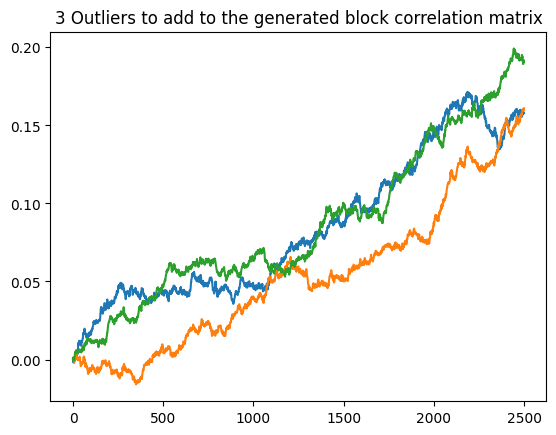

In [8]:
# Inspect outliers

plt.plot(((outlier1 + 1).cumprod()-1))
plt.plot(((outlier2 + 1).cumprod()-1))
plt.plot(((outlier3 + 1).cumprod()-1))
plt.title('3 Outliers to add to the generated block correlation matrix');

In [10]:
# Add outliers to random block correlation matrix
rets[num_cols] = outlier1
rets[num_cols+1] = outlier2
rets[num_cols+2] = outlier3

# sr = rets.mean()/rets.std() * np.sqrt(252)
rets

,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,100,101,102
0,0.000180,-0.000052,0.000080,0.000337,-0.000133,-0.000087,-0.000401,0.000399,-0.000175,0.000294,...,0.001211,0.000823,0.000407,0.001002,0.000686,0.001203,0.000703,-0.000481,0.001056,0.000596
1,-0.000213,-0.000542,-0.001090,-0.000515,-0.001135,-0.001043,0.000020,-0.000650,-0.000305,-0.000482,...,0.000495,0.000659,0.000809,-0.000070,0.000410,0.000292,0.000424,-0.000895,0.000241,0.000659
2,-0.000998,-0.001240,-0.001454,-0.001608,-0.001367,-0.001240,-0.000972,-0.001224,-0.001884,-0.001474,...,-0.000619,-0.000193,-0.000976,-0.000727,-0.000418,0.000016,-0.000602,-0.000431,-0.000783,-0.001889
3,-0.000116,-0.000479,-0.000307,-0.000520,-0.000396,-0.000192,-0.000572,-0.000238,-0.000331,-0.000166,...,0.000278,-0.000691,-0.000398,-0.000832,0.000350,-0.000422,-0.000636,-0.000180,-0.000801,0.000387
4,0.000076,-0.000216,0.000822,0.000618,0.000859,0.000464,0.000109,0.000202,0.000077,0.000650,...,0.000002,-0.000118,-0.000172,-0.000221,0.000526,0.000046,0.000935,0.001185,-0.000735,-0.000194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,-0.000122,0.000381,-0.000135,-0.000460,-0.000163,0.000388,-0.000826,0.000172,-0.000040,-0.000258,...,0.000696,0.000383,0.000050,0.000286,-0.000075,0.000465,0.000013,0.000372,-0.000691,-0.000024
2496,0.000053,0.000538,0.000366,0.000095,0.000784,0.000469,-0.000217,0.000052,0.000894,0.001218,...,0.000956,-0.000625,0.000389,0.000144,-0.000202,0.000092,0.000586,0.000643,0.000055,0.000730
2497,0.001281,0.000849,0.000140,0.000616,0.000326,0.000351,0.000307,0.000771,0.000531,-0.000160,...,0.000116,0.000745,0.000735,0.000807,0.000740,0.000440,0.000391,-0.000115,0.000572,0.000577
2498,0.001666,0.000763,-0.000391,-0.000462,-0.000454,-0.000426,-0.000196,0.000193,-0.000910,-0.000142,...,0.000018,0.000364,0.000627,0.000920,0.000623,-0.000478,0.000979,-0.000788,-0.000336,0.000793


In [11]:
rets.to_csv('simulated_data_cs2.csv', index=False)

In [12]:
rets = pd.read_csv('simulated_data_cs2.csv')

In [13]:
# Best Series
cum_rets = ((rets+1).cumprod()-1)

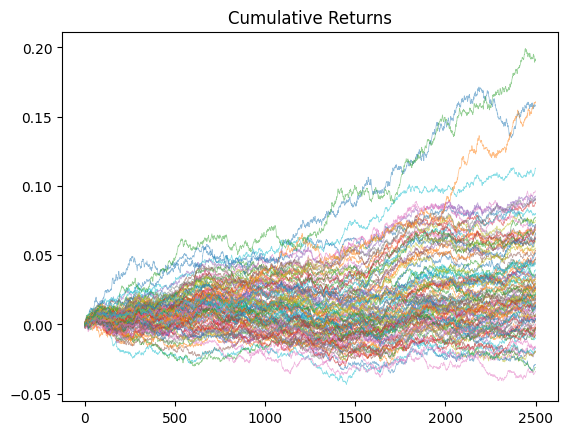

In [15]:
# Plot timeseries
plt.plot(cum_rets, alpha=0.5, linewidth=0.5)
#plt.plot(cum_rets[np.argmax(sr)])
plt.title('Cumulative Returns')
plt.show()

# Apply the ONC as is with range 2-N number of clusters

### Use denoising to find max_scan parameter

In [16]:
model_real_data = Signal(rets)

eMax, var, nFacts0 = model_real_data.findMaxEval(rets)

print(nFacts0)

13


### Apply the ONC with max_scan 

In [7]:
from onc_fast import ONC

In [8]:
import os
os.environ["OMP_NUM_THREADS"] = '16'
# Supress all warnings due to running Kmeans on windows using all cores
import warnings
warnings.filterwarnings("ignore")
import time

# Fit ONC
start_time = time.time()
model_r_2 = ONC(rets.corr(), repeat=450, max_scan=13)
# model = ONC(rets.corr(), repeat=100, max_scan=clusters_search, min_scan=3)
print('Fitting')
model_r_2.fit()
end_time = time.time()
print("Time taken: ", end_time - start_time)

# Load from saved
# model2 = ONC(data.corr(), repeat=1)
# model2.load_results(pre_fix='official3')

Fitting
Max_scan: 13
2
Time taken:  98.92402768135071


### Inspect cluster statistics

In [9]:
from sbumt import cluster_statistics

In [10]:
# Get the clusters
clusters_dict_r_2 = model_r_2.get_optimal_clusters()

# Create Table
table_statistics_r_2 = cluster_statistics(clusters_dict_r_2, rets)
table_statistics_r_2

,Strat Count,aSR,SR,Skew,Kurt,T,sqrt(V[SR_k]),E[max SR_k],DFS
0,3.0,2.091994,0.131783,0.006921,-0.069787,2500.0,0.067468,0.035067,0.999999
1,100.0,0.577341,0.036369,-0.047004,-0.009069,2500.0,0.067468,0.035067,0.525934


In [11]:
# Create colour column based on confidence interval
conf_level = 0.95
table_statistics_r_2['col'] = '#072040'
table_statistics_r_2.loc[table_statistics_r_2['DFS'] > conf_level, 'col'] = '#DE612F'

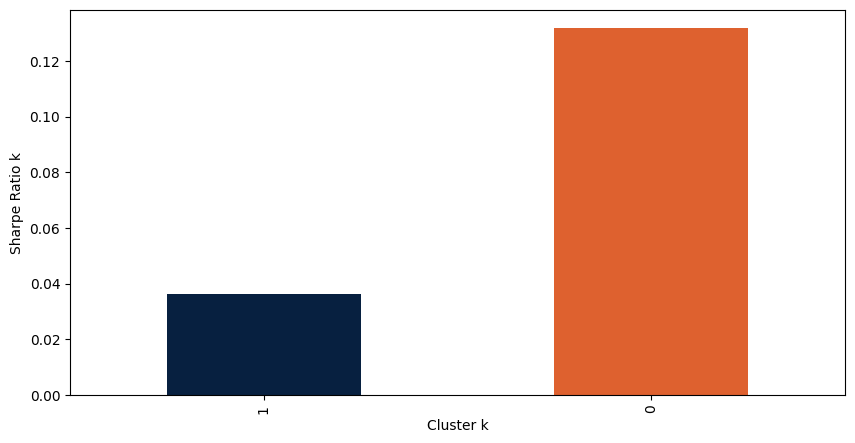

In [12]:
import matplotlib.font_manager
# Plot the Cluster's Sharpe Ratio and check whether that cluster passed the test.
sorted_clusters1 = table_statistics_r_2['SR'].values.argsort().flatten()
cols = table_statistics_r_2.loc[sorted_clusters1, 'col']

# Plot
table_statistics_r_2.loc[sorted_clusters1, 'SR'].plot(kind='bar', figsize=(10, 5), color=cols)
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
#plt.title('Cluster Sharpe Ratios')
plt.xlabel('Cluster k')
plt.ylabel('Sharpe Ratio k')
plt.show()

### Inspect sorted correlation matrix

In [13]:
model_r_2.get_block_correlation()

,102,101,100,73,72,71,70,69,68,67,...,34,33,32,31,30,29,28,27,37,51
102,1.000000,-0.023760,0.031593,-0.015813,-0.005068,-0.016482,0.005018,0.013634,-0.001456,-0.006239,...,0.003955,0.014284,-0.004913,-0.011055,0.013518,0.003871,-0.013866,0.009715,-0.016025,-0.018651
101,-0.023760,1.000000,0.007583,0.004189,0.037063,0.027389,0.009885,0.004599,0.013485,0.021207,...,0.014266,0.021544,0.028275,-0.004419,0.034768,0.027720,0.015680,0.022767,0.014802,0.044326
100,0.031593,0.007583,1.000000,0.003025,-0.002692,-0.003606,-0.000630,-0.000178,-0.011580,-0.004649,...,-0.027431,-0.019924,-0.021007,-0.032983,-0.020553,-0.012242,-0.018757,-0.011823,-0.025067,0.007239
73,-0.015813,0.004189,0.003025,1.000000,0.591988,0.610303,0.613666,0.615783,0.605949,0.614595,...,0.325510,0.325748,0.302984,0.299172,0.294542,0.292653,0.324575,0.311094,0.307136,0.326931
72,-0.005068,0.037063,-0.002692,0.591988,1.000000,0.584496,0.587043,0.609253,0.600516,0.602569,...,0.290087,0.302608,0.299369,0.276976,0.292877,0.279804,0.323320,0.319910,0.315560,0.319974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29,0.003871,0.027720,-0.012242,0.292653,0.279804,0.284757,0.290608,0.285913,0.284332,0.290459,...,0.604030,0.610279,0.605988,0.629990,0.618941,1.000000,0.605539,0.618219,0.314161,0.315459
28,-0.013866,0.015680,-0.018757,0.324575,0.323320,0.339153,0.319526,0.310321,0.314051,0.330007,...,0.601043,0.599378,0.610096,0.625775,0.622505,0.605539,1.000000,0.608676,0.330445,0.328684
27,0.009715,0.022767,-0.011823,0.311094,0.319910,0.326237,0.325591,0.316807,0.306865,0.309075,...,0.604467,0.618713,0.599981,0.622203,0.614046,0.618219,0.608676,1.000000,0.312895,0.313360
37,-0.016025,0.014802,-0.025067,0.307136,0.315560,0.320301,0.291881,0.322694,0.324526,0.306822,...,0.306419,0.303839,0.283421,0.295024,0.303031,0.314161,0.330445,0.312895,1.000000,0.308251


In [15]:
ss2 = model_r_2.get_silh_scores()
quality2 = ss2.mean()/ss2.std()
print(quality2)

11.79232141731988


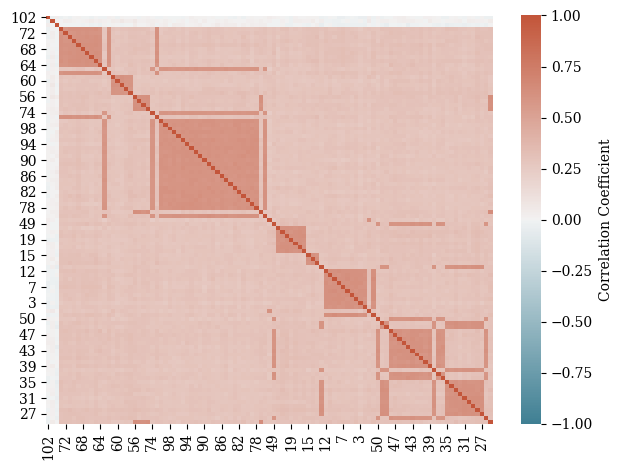

In [16]:
# Save results
model_r_2.save_results(pre_fix='official_test')
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.yticks(rotation = 0) 
plt.tight_layout()
plt.show()

# Apply the ONC with range 3-N to visualise the effect it has on the clustering results

In [17]:
from fast_onc_cs2 import ONC_range_change

In [18]:
import os
os.environ["OMP_NUM_THREADS"] = '16'
# Supress all warnings due to running Kmeans on windows using all cores
import warnings
warnings.filterwarnings("ignore")
import time

# Fit ONC
start_time = time.time()
model_r_3 = ONC_range_change(rets.corr(), repeat=450, max_scan=13)
# model = ONC(rets.corr(), repeat=100, max_scan=clusters_search, min_scan=3)
print('Fitting')
model_r_3.fit()
end_time = time.time()
print("Time taken: ", end_time - start_time)

# Load from saved
# model2 = ONC(data.corr(), repeat=1)
# model2.load_results(pre_fix='official3')

Fitting
Max_scan: 13
11
improving now
Max_scan: 13
8
Time taken:  168.6053740978241


### Inspect cluster statistics

In [19]:
from sbumt import cluster_statistics

In [20]:
# Get the clusters
clusters_dict_r_3 = model_r_3.get_optimal_clusters()

# Create Table
table_statistics_r_3 = cluster_statistics(clusters_dict_r_3, rets)
table_statistics_r_3

,Strat Count,aSR,SR,Skew,Kurt,T,sqrt(V[SR_k]),E[max SR_k],DFS
0,2.0,0.551688,0.034753,-0.044562,0.115836,2500.0,0.034509,0.055981,0.144463
1,3.0,0.602569,0.037958,-0.072370,0.080432,2500.0,0.034509,0.055981,0.184101
2,5.0,0.112162,0.007066,0.031711,0.063468,2500.0,0.034509,0.055981,0.007232
3,12.0,0.435665,0.027444,-0.015203,-0.039055,2500.0,0.034509,0.055981,0.076881
4,15.0,0.597432,0.037635,-0.029849,-0.007804,2500.0,0.034509,0.055981,0.179635
5,26.0,0.570521,0.035939,0.056155,0.175062,2500.0,0.034509,0.055981,0.157930
6,7.0,0.160606,0.010117,-0.008030,-0.054326,2500.0,0.034509,0.055981,0.010934
7,13.0,0.169799,0.010696,-0.050663,0.045340,2500.0,0.034509,0.055981,0.011813
8,11.0,0.224366,0.014134,0.083018,0.021883,2500.0,0.034509,0.055981,0.018166
9,3.0,2.091994,0.131783,0.006921,-0.069787,2500.0,0.034509,0.055981,0.999928


In [21]:
# Create colour column based on confidence interval
conf_level = 0.95
table_statistics_r_3['col'] = '#072040'
table_statistics_r_3.loc[table_statistics_r_3['DFS'] > conf_level, 'col'] = '#DE612F'

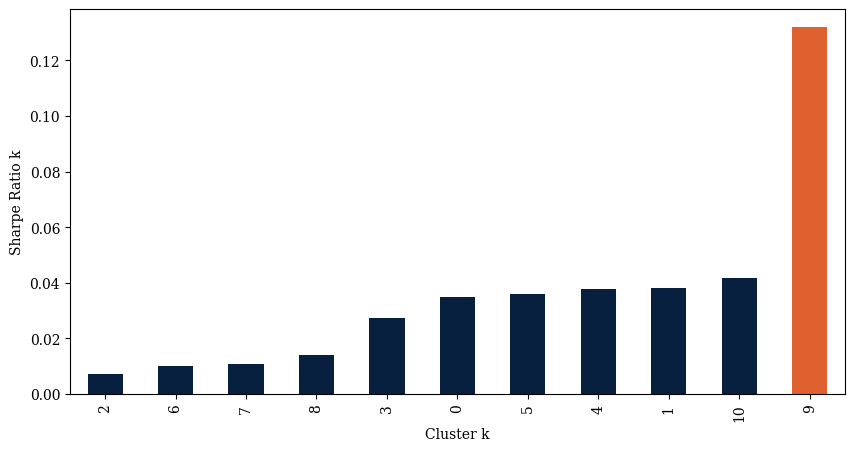

In [22]:
import matplotlib.font_manager
# Plot the Cluster's Sharpe Ratio and if that cluster passed the test.
sorted_clusters2 = table_statistics_r_3['SR'].values.argsort().flatten()
cols = table_statistics_r_3.loc[sorted_clusters2, 'col']

# Plot
table_statistics_r_3.loc[sorted_clusters2, 'SR'].plot(kind='bar', figsize=(10, 5), color=cols)
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
#plt.title('Cluster Sharpe Ratios')
plt.xlabel('Cluster k')
plt.ylabel('Sharpe Ratio k')
plt.show()

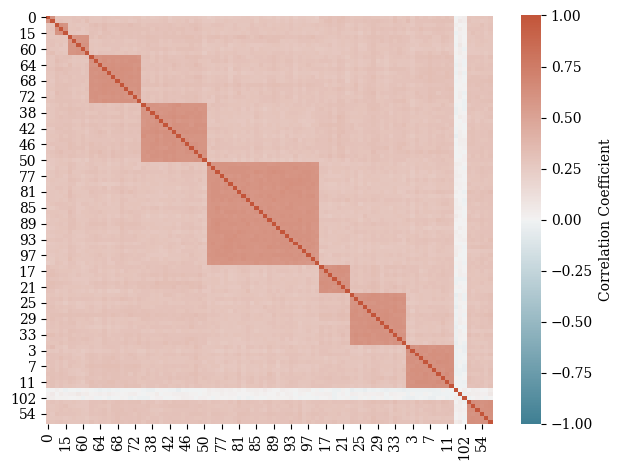

In [23]:
# Save results
model_r_3.save_results(pre_fix='official_test')
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.yticks(rotation = 0) 
plt.tight_layout()
plt.show()

In [24]:
ss3 = model_r_3.get_silh_scores()
quality3 = ss3.mean()/ss3.std()
print(quality3)

7.487923676715461
